\### SENTIMEN ANALISIS APLIKASI SHOPEE PADA GOOGLE PLAYSTORE

In [ ]:
import pandas as pd
import numpy as np #perhitungan
import re #mencari, mengedit, dan memanipulasi teks berdasarkan pola.
import string #menyediakan konstanta dan fungsi untuk operasi string.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [ ]:
review_nlp = pd.read_csv('/content/drive/MyDrive/SKRIPSI_DATAMINING/fix banget/insyaAlloh FIX/Bismillah FIX/terahir?/scrapped_data_shopeeee.csv')
review_nlp.head()

,content,score
0,Sangat membantu,5
1,Mantap,5
2,Apk yang tidak aman dan tidak mau bertanggung ...,1
3,Sangat membantu buat saya yg malas keluar rumah,5
4,Banyak bug error,2


In [ ]:
review_nlp['score'].value_counts()

score
5    3466
1     726
4     414
2     206
3     188
Name: count, dtype: int64

# Labeling

In [ ]:
label = []

for index, row in review_nlp.iterrows(): #Melakukan iterasi melalui setiap baris dalam DataFrame review_nlp
    if row['score'] >=4 :
        label.append(1) #label 1 untuk rating 4 keatas
    else :
        label.append(0) #label 0 untuk rating 3 sampai 1

review_nlp['label'] = label #list label yang telah diisi dengan nilai 0 dan 1
review_nlp = review_nlp.drop(columns=['score'])

review_nlp.head()

,content,label
0,Sangat membantu,1
1,Mantap,1
2,Apk yang tidak aman dan tidak mau bertanggung ...,0
3,Sangat membantu buat saya yg malas keluar rumah,1
4,Banyak bug error,0


In [ ]:
review_nlp

,content,label
0,Sangat membantu,1
1,Mantap,1
2,Apk yang tidak aman dan tidak mau bertanggung ...,0
3,Sangat membantu buat saya yg malas keluar rumah,1
4,Banyak bug error,0
...,...,...
4995,Ok,1
4996,"Saran ,Bagi temen2 Jangan download/ update sho...",0
4997,Gedein dong koin koin koin biar makin sering b...,1
4998,🥰💞,1


In [ ]:
review_nlp['label'].value_counts()
#label 1 3880 ulasan positif
#label 0 1120 ulasan negatif

label
1    3880
0    1120
Name: count, dtype: int64

# Mengatasi Data Tidak Seimbang

In [ ]:
#oversampling
s1 = review_nlp[review_nlp['label']==1].sample(2500, replace=True)
s2 = review_nlp[review_nlp['label']==0].sample(2500, replace=True)
review_nlp = pd.concat([s1,s2])
print(review_nlp.shape)
print(review_nlp['label'].value_counts(normalize=True))
#kelas positif dan negatif seimbang masing2 2500 sampel

(5000, 2)
label
1    0.5
0    0.5
Name: proportion, dtype: float64


# Visualisasi Text

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

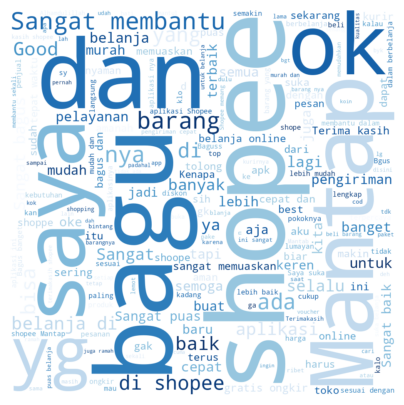

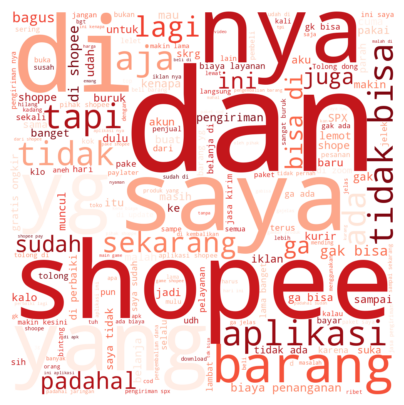

In [ ]:
content_1 = review_nlp[review_nlp['label']==1]
content_1 = ' '.join(word for word in content_1['content'])
wcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_1)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show() #ulasan positif

content_0 = review_nlp[review_nlp['label']==0]
content_0 = ' '.join(word for word in content_0['content'])
wcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode= 'RGBA', background_color='white').generate(content_0)
plt.figure(figsize=(5, 5))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show() #ulasan negatif

# Text Cleansing

In [ ]:
def remove_unused(text):
    text = re.sub('[0-9]+', '', text) #menghapus angka dari text
    text = re.sub(r'\$\w*', '', text) #menghapus kata dimulai dari $
    text = re.sub(r'@[\w]*', '', text)#menghapus nama pengguna mulai dari @
    text = re.sub(r'https?://\S+', '', text)#menghapus url
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = text.replace('\n', ' ')
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r'[^\x00-\x7f]', r'', text)
    text = re.sub(r'[^\w]', ' ', text)
    space = ['    ', '   ', '  ']
    for i in space:
        text = text.replace(i, ' ')
    text = text.lower().strip()
#     text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [ ]:
review_nlp['clean text'] = review_nlp['content'].apply(lambda x: remove_unused(x))
review_nlp = review_nlp[['clean text', 'label']] #hasil dari clean text

In [ ]:
review_nlp

,clean text,label
2886,shopeee bisa membantu hidup saya terimakasih b...,1
3520,belanja nyaman kurir ramah barang ok,1
1820,bagus,1
228,pengiriman sellu datang tpat waktu dan barang ...,1
2949,markotop,1
...,...,...
1776,pengajuan shopepaylatter spinjam selalu ditola...,0
4819,buruk semuanya bagusan tokopedia p,0
1562,dari pihak jasa pengiriman nya lelet banget te...,0
4082,mahal byk biaya,0


In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
#import stemmer
# memisahkan kata dalam tettxt
import nltk
from nltk.stem.snowball import SnowballStemmer
#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')
#import stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer_id = StemmerFactory().create_stemmer()

In [ ]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

# Now you can use the stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Instalasi pustaka
!pip install nltk

#import stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
stopworder = set(stopwords.words('indonesian', 'english'))
stopword = StopWordRemoverFactory().create_stop_word_remover()
from nltk.tokenize import word_tokenize
tokenizer = word_tokenize


In [ ]:
def cleansing(data):
    text = stemmer_id.stem(data)
    text = stopword.remove(text)
    text = tokenizer(text)
    text = [stemmer.stem(t) for t in text] #.split()]#stemmer inggris
    text = [word for word in text if word not in stopworder]
    text = ' '.join(word for word in text) # Menggabungkan kata-kata yang telah dibersihkan menjadi satu teks

    return text

In [ ]:
data

NameError: name 'data' is not defined

In [ ]:
# Contoh fungsi cleansing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Unduh sumber daya 'stopwords' dan 'punkt'
nltk.download('stopwords')
nltk.download('punkt')


In [ ]:
#contoh
tes ='jika novel berteriak minta keadilan bagaimana'
cleaned = cleansing(tes)
print(cleaned)

In [ ]:
data_clean = review_nlp['clean text'].apply(cleansing)

In [ ]:
data_clean

In [ ]:
review_nlp['text'] = data_clean
data_nlp = review_nlp[['text', 'label']]

In [ ]:
data_nlp.head()

# Featur Enginering TF-IDF

 Fungsi ini menghitung bobot setiap kata dalam sebuah dokumen berdasarkan frekuensi kemunculan kata tersebut dalam dokumen dan seberapa jarang kata tersebut muncul di seluruh koleksi dokumen.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #mengukur kepentingan sebuah kata

In [ ]:
vectorizer_tfidf = TfidfVectorizer() #inisialisasi

In [ ]:
chat = ['halo apa kabar',
        'selamat bulan puasa',
        'lagi dimana',
        'how dinner eat'
       ]
chet = ['haha apa kabar',
        'selam bulan puasa',
        'lagi mana',
        'horse eat'
       ]

In [ ]:
vectorized_tfidf = vectorizer_tfidf.fit_transform(chat)

In [ ]:
vectorized_tfidf.shape

In [ ]:
#contoh feature
print(vectorized_tfidf.todense())

In [ ]:
# Membuat TF-IDF Vectorizer
vectorizer_tfidf = TfidfVectorizer()

# Melakukan fit dan transformasi pada dokumen
X = vectorizer_tfidf.fit_transform(chat)

# Mendapatkan fitur nama menggunakan get_feature_names_out()
feature_names = vectorizer_tfidf.get_feature_names_out()
print(feature_names)

In [ ]:
#implementasi pada text dan label
#train=pelatihan, teste=pengujian

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(review_nlp['text'], review_nlp['label'], test_size=0.1,
                                                  stratify = review_nlp['label'], random_state=30)

In [ ]:
X_train = vectorizer_tfidf.fit_transform(X_train)
X_test = vectorizer_tfidf.transform(X_test)

print(X_train.shape)
print(X_test.shape)

# Modeling

In [ ]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear')

In [ ]:
model_svm.fit(X_train, y_train)

In [ ]:
pred = model_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy : {accuracy}')

In [ ]:
clf_r = classification_report(y_test, pred)
print(clf_r)

In [ ]:
pip install --upgrade scikit-learn

# Simpan Model

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Contoh data
data = [
    "Saya sangat senang dengan produk ini",
    "Kualitasnya buruk sekali",
    "Pelayanan yang memuaskan",
    "Tidak puas dengan pembelian ini",
    "Produk ini luar biasa",
    "Sangat mengecewakan",
    # Tambahkan data lainnya
]
labels = [1, 0, 1, 0, 1, 0]  # 1 untuk positif, 0 untuk negatif

# Pisahkan data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Buat vectorizer dan transformasikan data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Buat model dan latih
model = SVC()
model.fit(X_train_vectorized, y_train)

# Simpan model dan vectorizer
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


# Prediksi

In [ ]:
label = {1 : 'good', 0 : 'bad'}
print(label)

In [ ]:
text_good = 'sangat bagus, aplikasi mudah membantu, suka berguna'
text_bad = 'susah jelek, tidak berguna, buruk kecewa, sulit dipakai lambat banyak iklan'

# Cleansing

In [ ]:
text_clean = remove_unused(text_bad)
print(text_clean)
text_clean = cleansing(text_clean)
print(text_clean)

# To Numeric

In [ ]:
pred_text = vectorizer_tfidf.transform([text_clean])
print(pred_text.shape)
print(pred_text.todense())

In [ ]:
prediksi = model_svm.predict(pred_text)
i = np.max(prediksi)
lab = label[i]
hasil = (f'merupakan text : {lab}')
print(hasil)

## perbatasan

In [ ]:
text_good = 'kamu jelek banget, ga ada yang mau sama kamu, kamu hitam dekil banget, ga keurus, kurus, gemuk'
text_bad = 'kamu jelek banget, ga ada yang mau sama kamu, kamu hitam dekil banget, ga keurus, kurus, gemuk'

In [ ]:
text_clean = remove_unused(text_good)
print(text_clean)
text_clean = cleansing(text_clean)
print(text_clean)

In [ ]:
pred_text = vectorizer_tfidf.transform([text_clean])
print(pred_text.shape)
print(pred_text.todense())

In [ ]:
prediksi = model_svm.predict(pred_text)
i = np.max(prediksi)
lab = label[i]
hasil = (f'merupakan text : {lab}')
print(hasil)

## perbatasan 2

In [ ]:
text_good = 'tidak bagus, tidak recommend, tidak baik,'
text_bad = 'bagus, recommend, baik'

In [ ]:
text_clean = remove_unused(text_good)
print(text_clean)
text_clean = cleansing(text_clean)
print(text_clean)

In [ ]:
pred_text = vectorizer_tfidf.transform([text_clean])
print(pred_text.shape)
print(pred_text.todense())

In [ ]:
prediksi = model_svm.predict(pred_text)
i = np.max(prediksi)
lab = label[i]
hasil = (f'merupakan text : {lab}')
print(hasil)